### Load data set

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [2]:
import pandas as pd

url = ("https://raw.githubusercontent.com/edrjayawardena/seer_breast_cancer_data_analysis_with_XAI/refs/heads/main/SEER%20Breast%20Cancer%20Dataset.csv")

# Load the dataset
data = pd.read_csv(url)

### Data Preprocessing & EDA


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginal Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [5]:
data.shape

(4024, 15)

In [6]:
data.head(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginal Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive


In [7]:
data.tail(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginal Node Positive,Survival Months,Status
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,8,Positive,Positive,1,1,107,Alive


In [8]:
data.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginal Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginal Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [10]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginal Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [11]:
data.describe(include='all')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginal Node Positive,Survival Months,Status
count,4024.000000,4024,4024,4024,4024,4024,4024,4024,4024.000000,4024,4024,4024.000000,4024.000000,4024.000000,4024
unique,NaN,3,5,4,3,5,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married (including common law),T2,N1,IIA,Moderately differentiated; Grade II,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3413,2643,1786,2732,1305,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.972167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.473658,NaN,NaN,14.357107,4.158052,71.297962,NaN
std,8.963134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.119696,NaN,NaN,8.099675,5.109331,22.921430,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


In [12]:
# Check for missing values
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginal Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [13]:
data['Status'].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

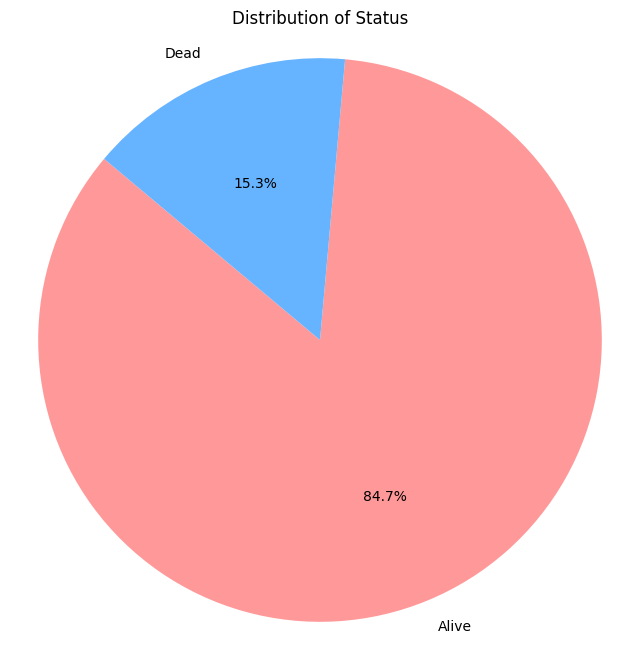

In [14]:
import matplotlib.pyplot as plt


# Calculate the distribution of the target variable 'Status'
status_counts = data['Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

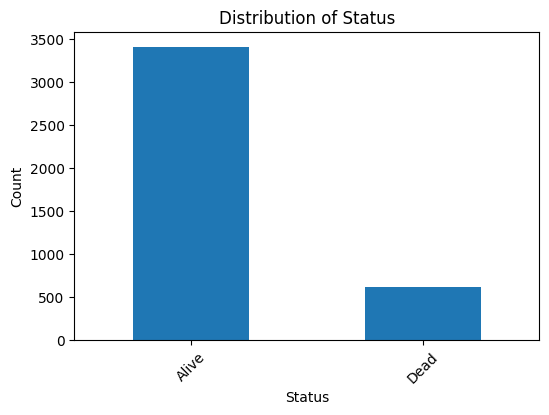

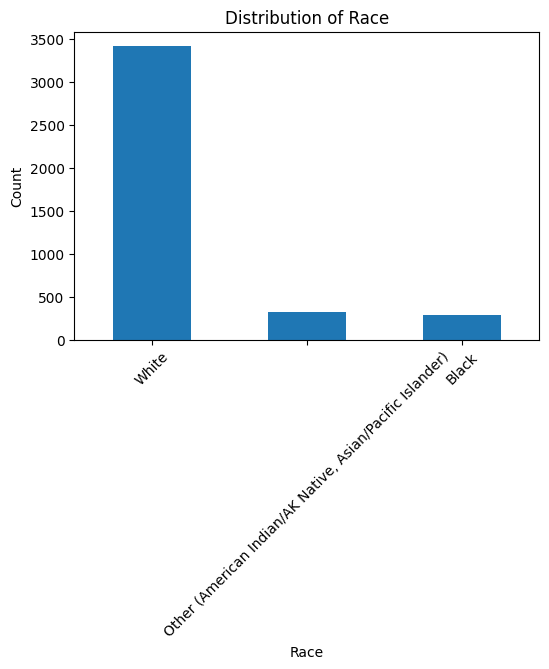

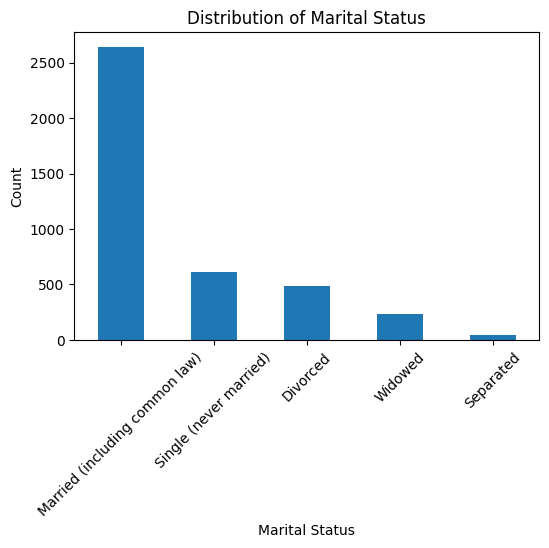

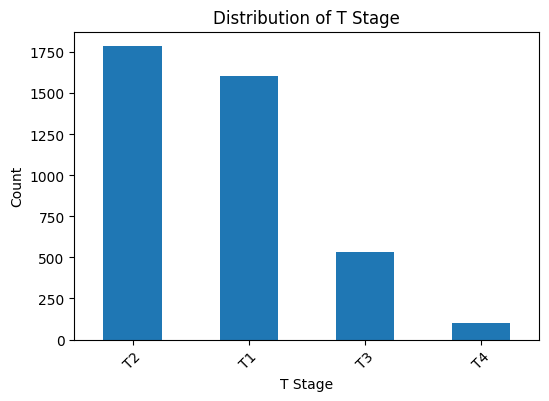

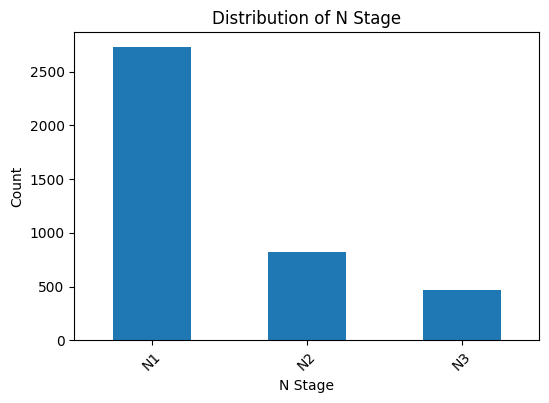

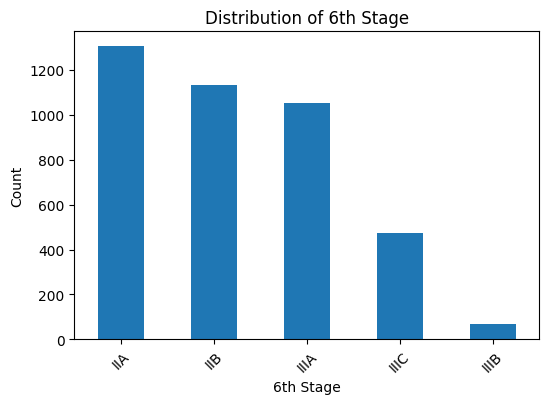

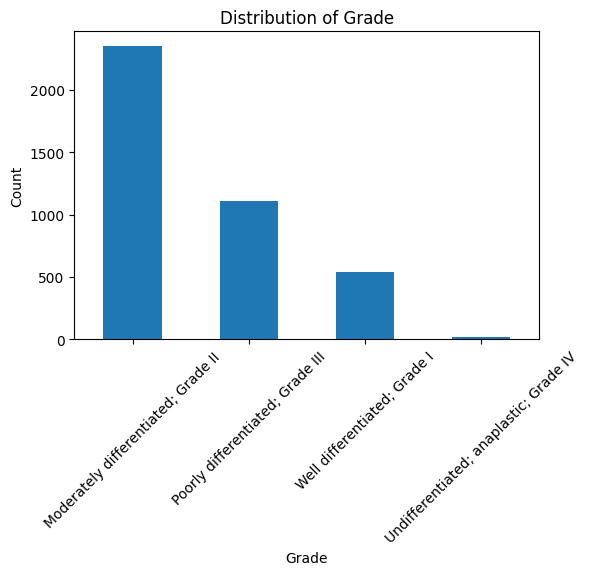

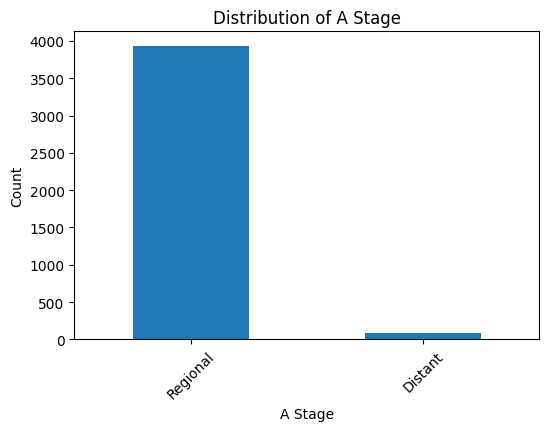

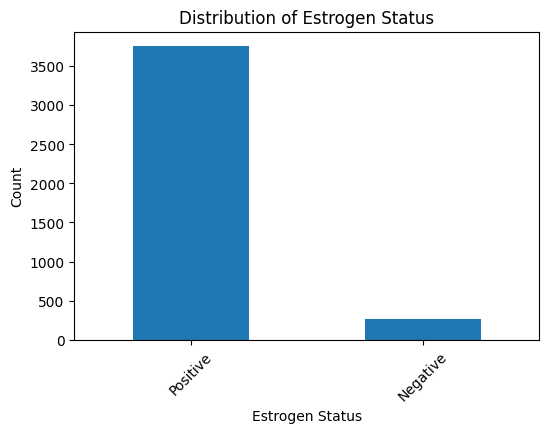

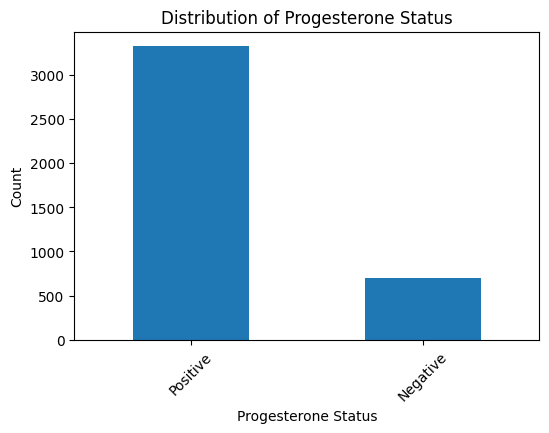

In [15]:
# List of categorical columns
categorical_columns = [
    'Status',
    'Race',
    'Marital Status',
    'T Stage',
    'N Stage',
    '6th Stage',
    'Grade',
    'A Stage',
    'Estrogen Status',
    'Progesterone Status'


]

# Plot bar plots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Ordinal Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

# Define the mappings for ordinal categorical variables
t_stage_mapping = {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}
n_stage_mapping = {'N1': 1, 'N2': 2, 'N3': 3}
sixth_stage_mapping = {'IIA': 1, 'IIB': 2, 'IIIA': 3, 'IIIB': 4, 'IIIC': 5}
grade_mapping = {'Well differentiated; Grade I': 1,
                 'Moderately differentiated; Grade II': 2,
                 'Poorly differentiated; Grade III': 3,
                 'Undifferentiated; anaplastic; Grade IV': 4}
Status_mapping = {'Alive': 1, 'Dead': 0}

# Apply the mappings to the DataFrame
data['T Stage'] = data['T Stage'].map(t_stage_mapping)
data['N Stage'] = data['N Stage'].map(n_stage_mapping)
data['6th Stage'] = data['6th Stage'].map(sixth_stage_mapping)
data['Grade'] = data['Grade'].map(grade_mapping)
data['Status'] = data['Status'].map(Status_mapping)

In [17]:
data.head(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginal Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),2,3,5,2,Regional,40,Positive,Positive,19,11,1,1
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),2,2,3,2,Regional,45,Positive,Positive,25,9,2,1
2,67,White,Married (including common law),2,1,2,3,Regional,25,Positive,Positive,4,1,2,0


In [18]:
# Get the data types of all columns
print("Data Types of All Columns:")
data.dtypes

Data Types of All Columns:


Age                        int64
Race                      object
Marital Status            object
T Stage                    int64
N Stage                    int64
6th Stage                  int64
Grade                      int64
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginal Node Positive      int64
Survival Months            int64
Status                     int64
dtype: object

In [19]:
# Filter for categorical variables (object or category dtype)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Print the data types of categorical columns
print("\nData Types of Categorical Columns:")
print(data[categorical_columns].dtypes)


Data Types of Categorical Columns:
Race                   object
Marital Status         object
A Stage                object
Estrogen Status        object
Progesterone Status    object
dtype: object


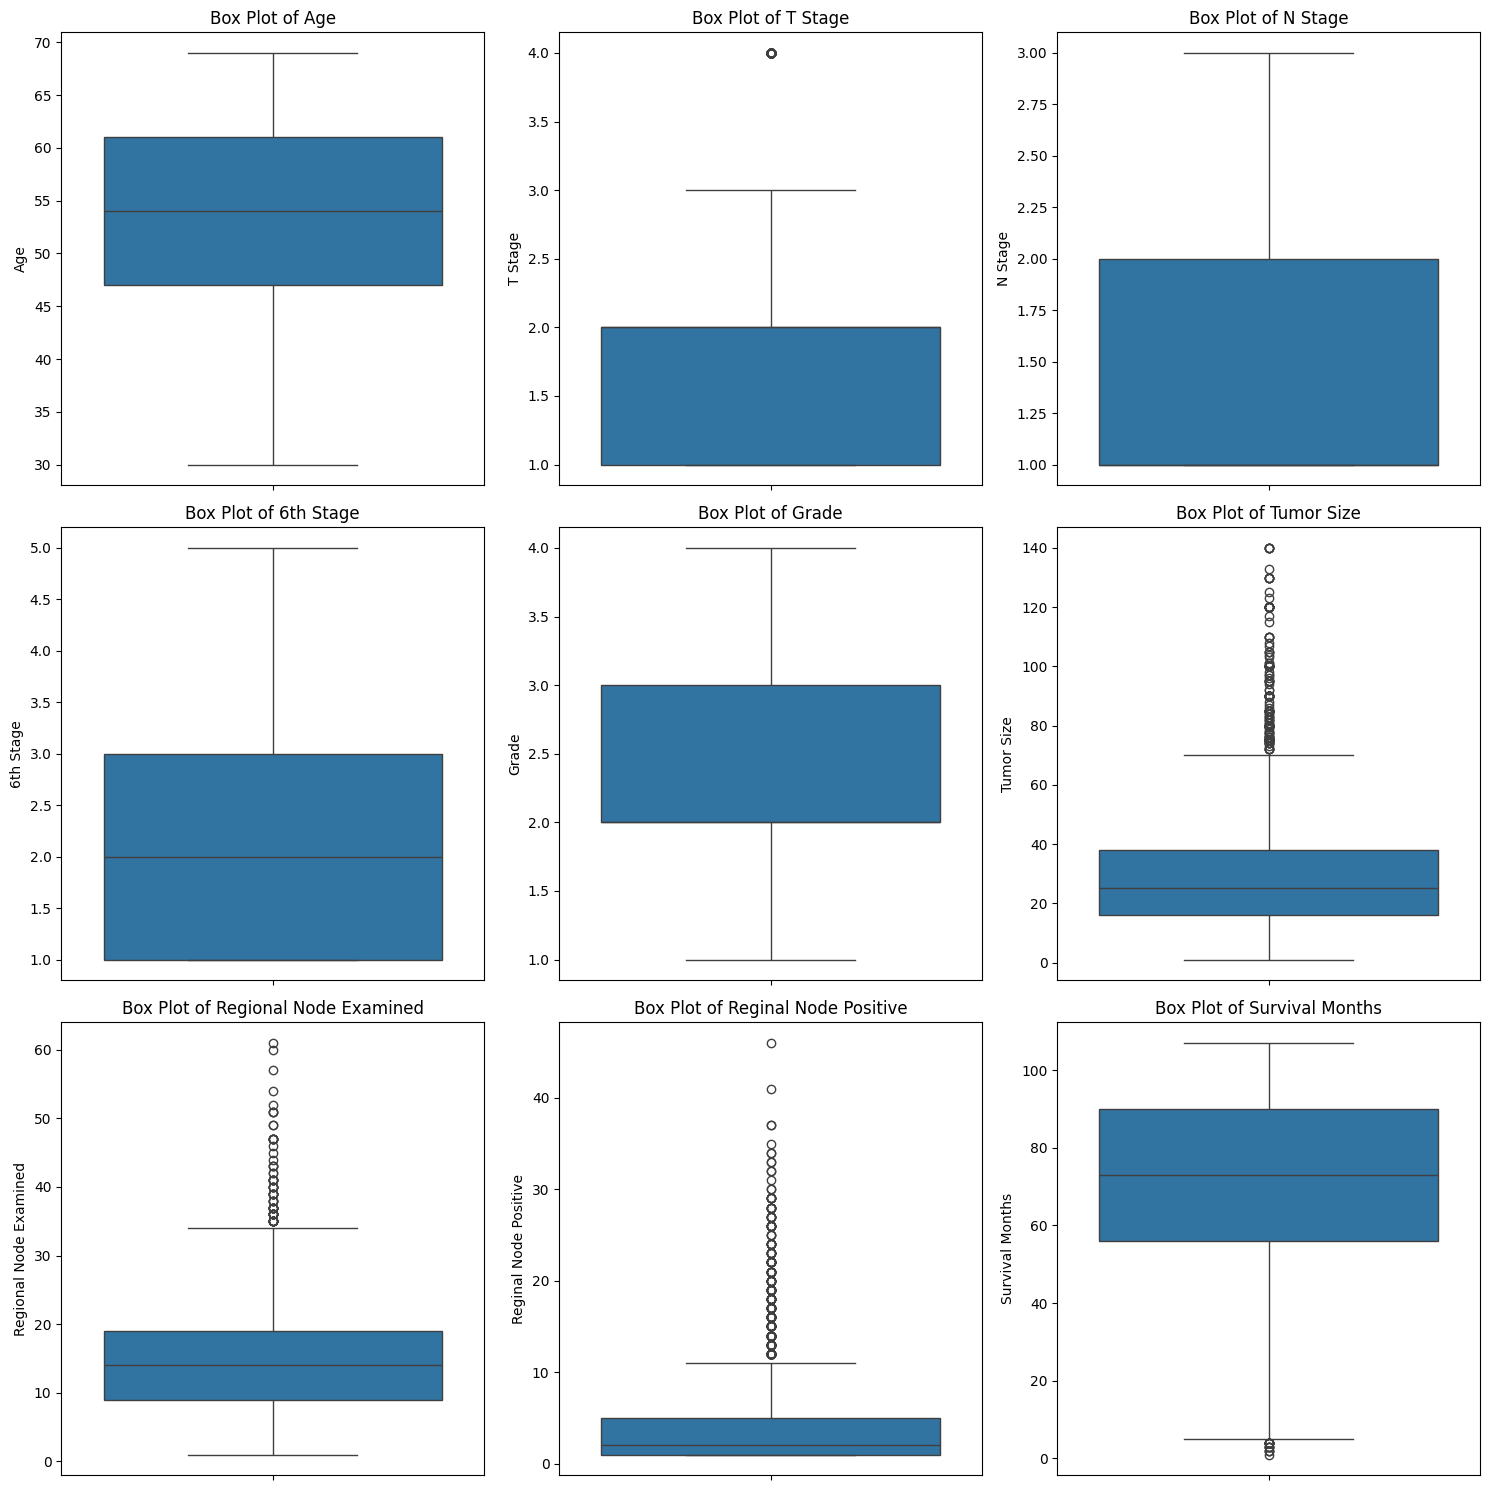

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of variables to visualize
variables = [
    'Age',
    'T Stage',
    'N Stage',
    '6th Stage',
    'Grade',
    'Tumor Size',
    'Regional Node Examined',
    'Reginal Node Positive',
    'Survival Months'
]

# Plot box plots for each variable
plt.figure(figsize=(15, 15))

for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.boxplot(y=var, data=data)
    plt.title(f'Box Plot of {var}')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


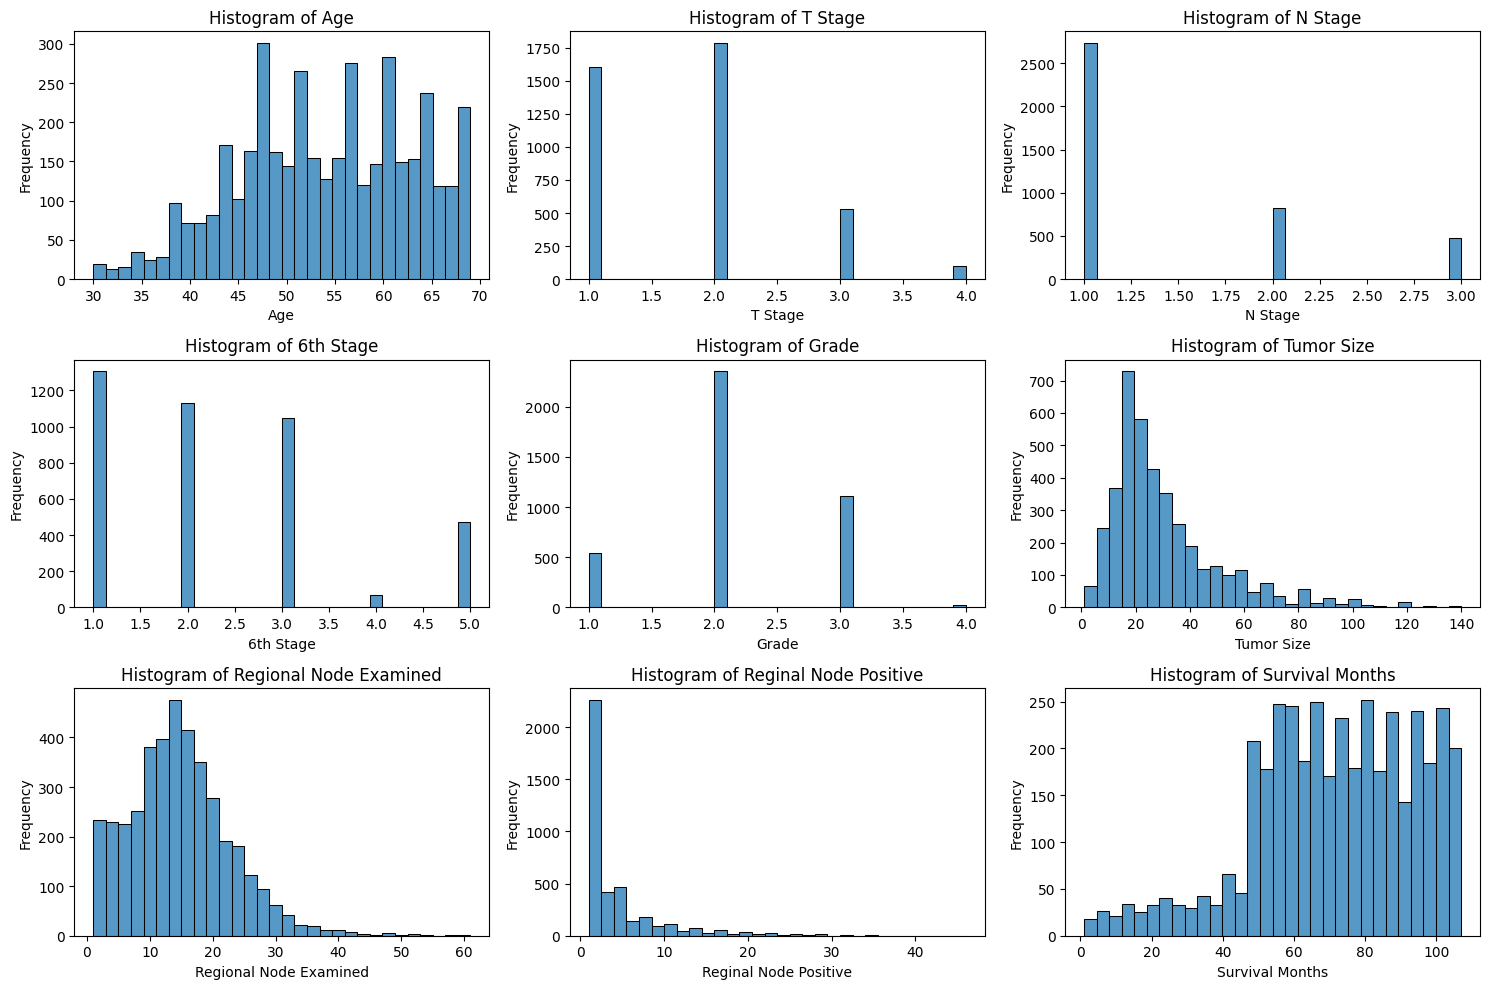

In [21]:
# List of variables to visualize
variables = [
    'Age',
    'T Stage',
    'N Stage',
    '6th Stage',
    'Grade',
    'Tumor Size',
    'Regional Node Examined',
    'Reginal Node Positive',
    'Survival Months'
]

# Plot histograms for each variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.histplot(data[var], kde=False, bins=30)  # kde=False disables the Kernel Density Estimate line
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

One hot encoding

In [22]:
# Define categorical columns for one-hot encoding
cat_cols = ['Race', 'Marital Status', 'A Stage', 'Estrogen Status', 'Progesterone Status']

# Apply one-hot encoding using pd.get_dummies()
data = pd.get_dummies(data, columns=cat_cols, dtype=int)

In [23]:
data.head(11)

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginal Node Positive,Survival Months,Status,...,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,43,2,3,5,2,40,19,11,1,1,...,1,0,0,0,0,1,0,1,0,1
1,47,2,2,3,2,45,25,9,2,1,...,1,0,0,0,0,1,0,1,0,1
2,67,2,1,2,3,25,4,1,2,0,...,1,0,0,0,0,1,0,1,0,1
3,46,1,1,1,2,19,26,1,2,0,...,0,0,0,0,0,1,0,1,0,1
4,63,2,2,3,2,35,21,5,3,0,...,1,0,0,0,0,1,0,1,0,1
5,49,2,3,5,2,32,20,11,3,1,...,1,0,0,0,0,1,0,1,0,1
6,64,2,1,2,2,22,1,1,3,0,...,0,0,1,0,0,1,0,1,0,1
7,55,1,1,1,2,15,9,1,3,1,...,1,0,0,0,0,1,0,1,0,1
8,59,3,1,3,2,70,9,1,4,0,...,0,0,1,0,0,1,0,1,0,1
9,67,3,2,3,3,55,9,9,4,0,...,1,0,0,0,0,1,0,1,0,1


In [24]:
data.shape

(4024, 24)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 24 columns):
 #   Column                                                          Non-Null Count  Dtype
---  ------                                                          --------------  -----
 0   Age                                                             4024 non-null   int64
 1   T Stage                                                         4024 non-null   int64
 2   N Stage                                                         4024 non-null   int64
 3   6th Stage                                                       4024 non-null   int64
 4   Grade                                                           4024 non-null   int64
 5   Tumor Size                                                      4024 non-null   int64
 6   Regional Node Examined                                          4024 non-null   int64
 7   Reginal Node Positive                                           4024 

In [26]:
data.describe()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginal Node Positive,Survival Months,Status,...,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,...,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,1.784791,1.438370,2.321819,2.150596,30.473658,14.357107,4.158052,71.297962,0.846918,...,0.656809,0.011183,0.152833,0.058400,0.022863,0.977137,0.066849,0.933151,0.173459,0.826541
std,8.963134,0.765531,0.693479,1.266624,0.638234,21.119696,8.099675,5.109331,22.921430,0.360111,...,0.474834,0.105169,0.359871,0.234527,0.149485,0.149485,0.249791,0.249791,0.378691,0.378691
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,1.000000,2.000000,16.000000,9.000000,1.000000,56.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,2.000000,1.000000,2.000000,2.000000,25.000000,14.000000,2.000000,73.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,61.000000,2.000000,2.000000,3.000000,3.000000,38.000000,19.000000,5.000000,90.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,69.000000,4.000000,3.000000,5.000000,4.000000,140.000000,61.000000,46.000000,107.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
data['Status'].value_counts()

Status
1    3408
0     616
Name: count, dtype: int64

In [28]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of each feature with the target variable 'Status'
status_corr = correlation_matrix['Status'].sort_values(ascending=False)

# Display the correlation values
print(status_corr)

Status                                                            1.000000
Survival Months                                                   0.476514
Estrogen Status_Positive                                          0.184650
Progesterone Status_Positive                                      0.177079
A Stage_Regional                                                  0.096584
Marital Status_Married (including common law)                     0.067734
Race_Other (American Indian/AK Native, Asian/Pacific Islander)    0.040780
Race_White                                                        0.023977
Marital Status_Single (never married)                            -0.018902
Marital Status_Divorced                                          -0.033045
Regional Node Examined                                           -0.034772
Marital Status_Widowed                                           -0.038338
Marital Status_Separated                                         -0.053237
Age                      

C:\Users\Rajitha\AppData\Local\Temp\ipykernel_7800\153779530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_corr.index, y=status_corr.values, palette='viridis')


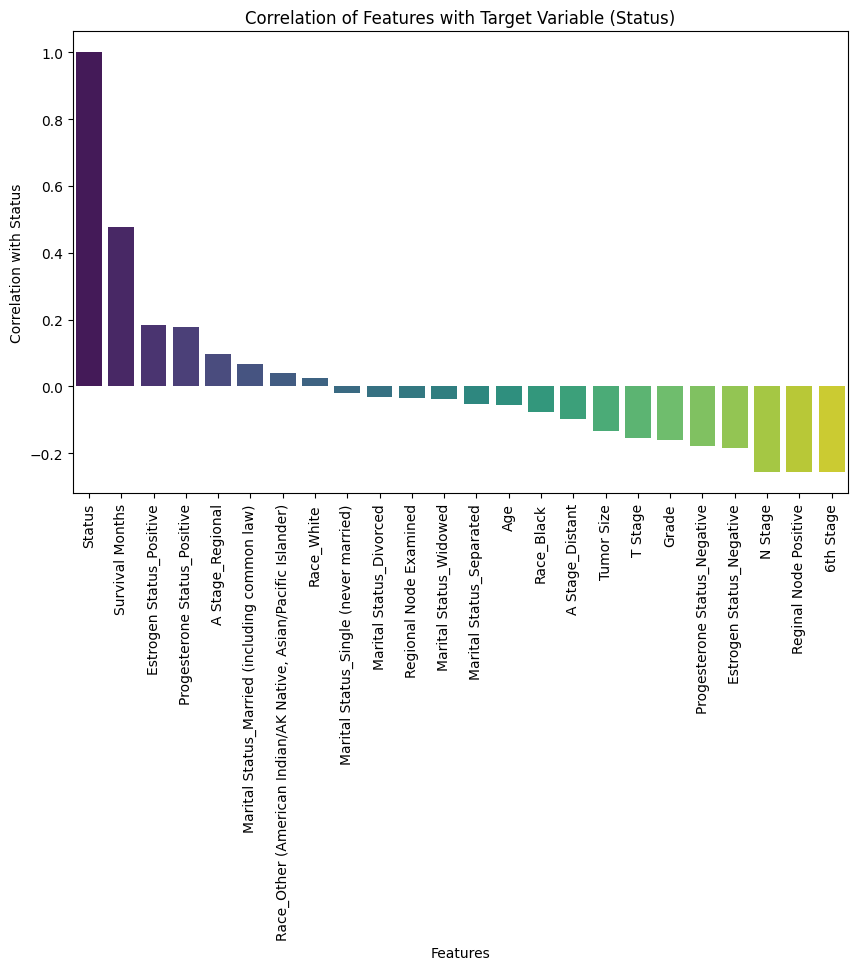

In [29]:
# Visualize the correlation of features with the target variable 'Status'
plt.figure(figsize=(10, 6))
sns.barplot(x=status_corr.index, y=status_corr.values, palette='viridis')
plt.title('Correlation of Features with Target Variable (Status)')
plt.xlabel('Features')
plt.ylabel('Correlation with Status')
plt.xticks(rotation=90)
plt.show()

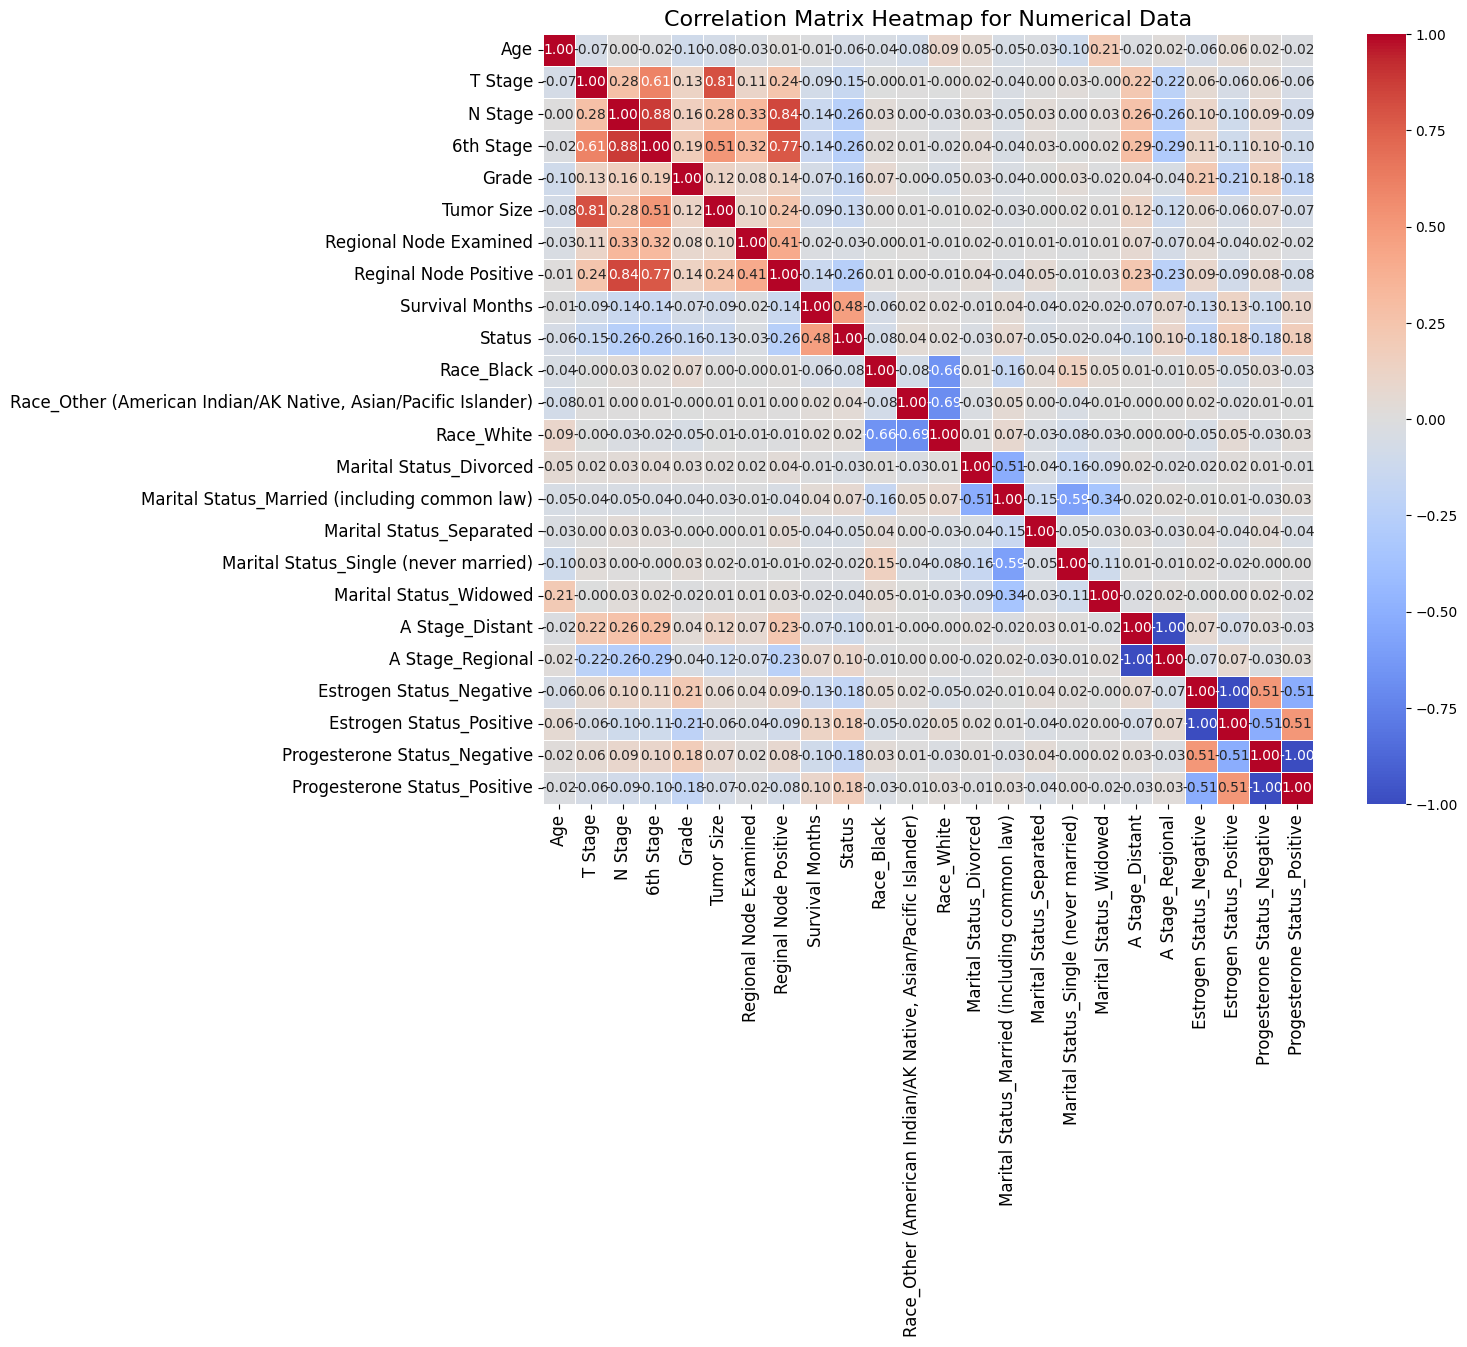

In [30]:
# Select only the numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(14, 10))

# Draw the heatmap with larger annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, annot_kws={"size": 10})

# Add a title with larger font size
plt.title('Correlation Matrix Heatmap for Numerical Data', fontsize=16)

# Increase the size of the labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop('Status', axis=1)
y = data['Status']

# Split the dataset into training and testing sets
# Using a common split ratio of 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3219, 23)
X_test shape: (805, 23)
y_train shape: (3219,)
y_test shape: (805,)


In [32]:
# Get feature names from the original DataFrame
feature_names = X.columns.tolist()
feature_names

['Age',
 'T Stage',
 'N Stage',
 '6th Stage',
 'Grade',
 'Tumor Size',
 'Regional Node Examined',
 'Reginal Node Positive',
 'Survival Months',
 'Race_Black',
 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)',
 'Race_White',
 'Marital Status_Divorced',
 'Marital Status_Married (including common law)',
 'Marital Status_Separated',
 'Marital Status_Single (never married)',
 'Marital Status_Widowed',
 'A Stage_Distant',
 'A Stage_Regional',
 'Estrogen Status_Negative',
 'Estrogen Status_Positive',
 'Progesterone Status_Negative',
 'Progesterone Status_Positive']

In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [34]:
y_resampled.shape

(5472,)

In [35]:
X_resampled.shape

(5472, 23)

In [36]:
X_test.describe()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginal Node Positive,Survival Months,Race_Black,...,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,...,805.000000,805.000000,805.000000,805.00000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,54.034783,1.754037,1.474534,2.356522,2.172671,30.674534,14.300621,4.352795,69.895652,0.069565,...,0.637267,0.009938,0.166460,0.06087,0.024845,0.975155,0.070807,0.929193,0.191304,0.808696
std,9.040609,0.739184,0.712999,1.285529,0.649338,22.097216,8.114483,5.452167,24.257256,0.254571,...,0.481088,0.099254,0.372724,0.23924,0.155748,0.155748,0.256662,0.256662,0.393573,0.393573
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,1.000000,2.000000,16.000000,9.000000,1.000000,55.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,2.000000,1.000000,2.000000,2.000000,25.000000,13.000000,2.000000,72.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,61.000000,2.000000,2.000000,3.000000,3.000000,37.000000,19.000000,5.000000,89.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,69.000000,4.000000,3.000000,5.000000,4.000000,140.000000,51.000000,41.000000,107.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
y_test.describe()

count    805.000000
mean       0.834783
std        0.371608
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Status, dtype: float64

In [38]:
# from sklearn.feature_selection import mutual_info_classif

# # Calculate mutual information on the resampled data
# mi = mutual_info_classif(X_resampled, y_resampled, discrete_features='auto')

# # Plot mutual information scores for all features
# plt.figure(figsize=(10, 6))
# plt.barh(X.columns, mi, color='skyblue')
# plt.xlabel('Mutual Information Score')
# plt.title('Mutual Information Scores for Features')
# plt.show()

In [39]:
# from sklearn.feature_selection import mutual_info_classif, SelectKBest

# # Calculate mutual information on the resampled data
# mi = mutual_info_classif(X_resampled, y_resampled, discrete_features='auto')

# # Select top 10 features based on mutual information
# k = 10
# selector = SelectKBest(mutual_info_classif, k=k)
# X_new = selector.fit_transform(X_resampled, y_resampled)

# # Get selected feature names
# selected_features = X.columns[selector.get_support()]

# # Plot mutual information scores for the top 10 features
# plt.figure(figsize=(10, 6))
# plt.barh(selected_features, mi[selector.get_support()], color='indigo')
# plt.xlabel('Mutual Information Score')
# plt.title(f'Top {k} Features by Mutual Information Score')
# plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Transform the test data (use the same scaler fit on training data)
X_test_scaled = scaler.transform(X_test)


In [41]:
X_resampled_scaled

array([[-0.26762876,  1.47751679, -0.69888808, ...,  0.4306297 ,
        -0.42614815,  0.66618276],
       [ 0.17970673, -1.12340708,  0.64675428, ...,  0.4306297 ,
         2.34660176, -1.50108958],
       [ 1.29804546,  0.17705485,  1.99239663, ...,  0.4306297 ,
        -0.42614815,  0.66618276],
       ...,
       [-0.4912965 ,  0.17705485, -0.69888808, ...,  0.4306297 ,
        -0.42614815, -1.50108958],
       [-0.26762876,  0.17705485,  1.99239663, ...,  0.4306297 ,
        -0.42614815, -1.50108958],
       [-0.04396101,  0.17705485, -0.69888808, ...,  0.4306297 ,
        -0.42614815,  0.66618276]])

In [42]:
X_test_scaled

array([[-0.82679812,  0.17705485, -0.69888808, ...,  0.4306297 ,
        -0.42614815,  0.66618276],
       [-1.49780136,  1.47751679, -0.69888808, ...,  0.4306297 ,
        -0.42614815,  0.66618276],
       [ 0.96254384,  1.47751679, -0.69888808, ...,  0.4306297 ,
        -0.42614815,  0.66618276],
       ...,
       [ 1.18621159,  0.17705485, -0.69888808, ...,  0.4306297 ,
        -0.42614815,  0.66618276],
       [-2.39247234,  0.17705485, -0.69888808, ...,  0.4306297 ,
         2.34660176, -1.50108958],
       [ 1.29804546, -1.12340708, -0.69888808, ...,  0.4306297 ,
        -0.42614815,  0.66618276]])

### Models Training and Evaluation

In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the resampled and scaled training data
logreg.fit(X_resampled_scaled, y_resampled)

# Make predictions on the scaled test data
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8819875776397516
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.56      0.61       133
           1       0.92      0.95      0.93       672

    accuracy                           0.88       805
   macro avg       0.79      0.75      0.77       805
weighted avg       0.88      0.88      0.88       805

Confusion Matrix:
 [[ 74  59]
 [ 36 636]]
ROC-AUC Score: 0.8648182957393484


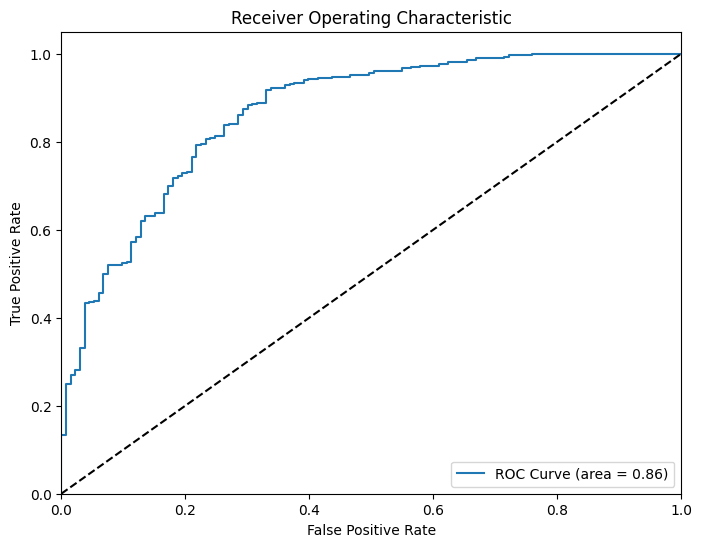

In [45]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.8782608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.43      0.54       133
           1       0.90      0.97      0.93       672

    accuracy                           0.88       805
   macro avg       0.81      0.70      0.73       805
weighted avg       0.87      0.88      0.87       805

Confusion Matrix:
 [[ 57  76]
 [ 22 650]]
ROC-AUC Score: 0.8301669351951307


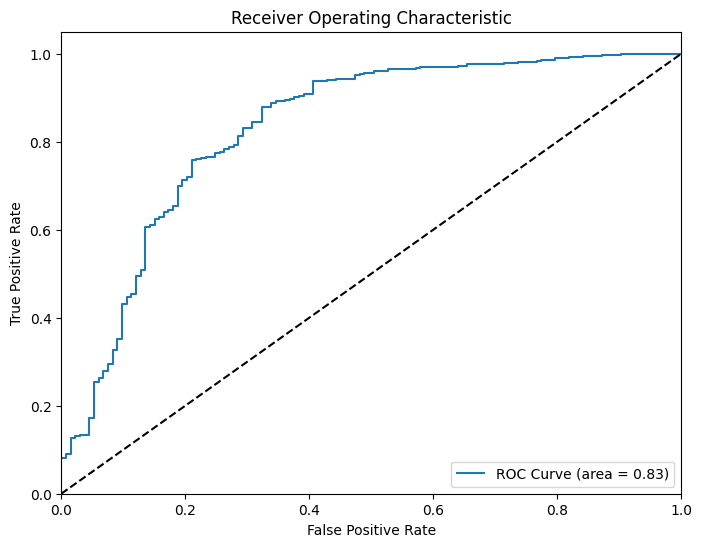

In [46]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(random_state=42, probability=True)

# Train the model on the resampled and scaled training data
svm.fit(X_resampled_scaled, y_resampled)

# Make predictions on the scaled test data
y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8173913043478261
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.59      0.51       133
           1       0.91      0.86      0.89       672

    accuracy                           0.82       805
   macro avg       0.69      0.72      0.70       805
weighted avg       0.84      0.82      0.83       805

Confusion Matrix:
 [[ 78  55]
 [ 92 580]]
ROC-AUC Score: 0.724780701754386


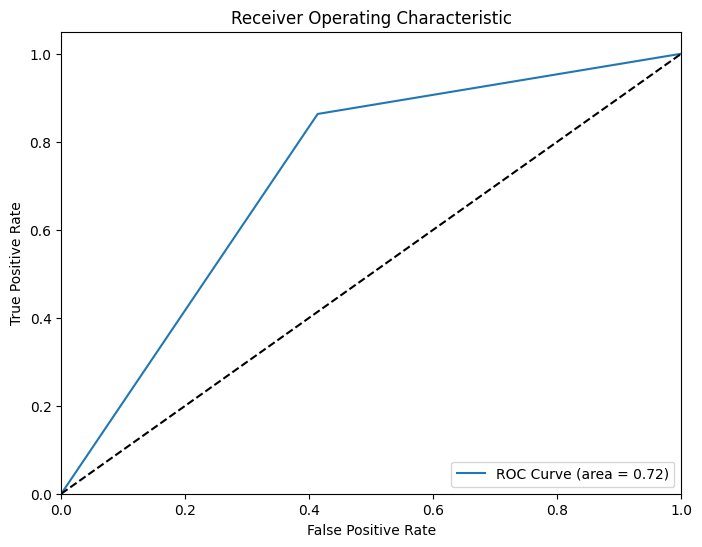

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled and scaled training data
decision_tree.fit(X_resampled_scaled, y_resampled)

# Make predictions on the scaled test data
y_pred = decision_tree.predict(X_test_scaled)
y_proba = decision_tree.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.884472049689441
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       133
           1       0.93      0.94      0.93       672

    accuracy                           0.88       805
   macro avg       0.79      0.78      0.79       805
weighted avg       0.88      0.88      0.88       805

Confusion Matrix:
 [[ 83  50]
 [ 43 629]]
ROC-AUC Score: 0.8617525957751522


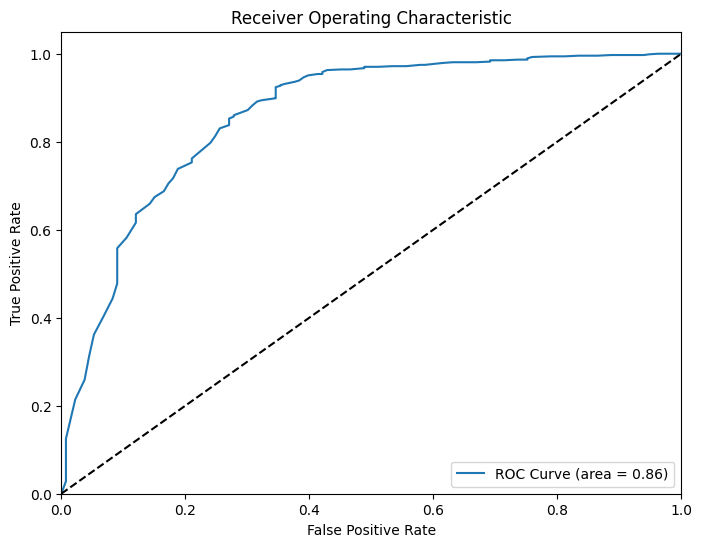

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the resampled and scaled training data
random_forest.fit(X_resampled_scaled, y_resampled)

# Make predictions on the scaled test data
y_pred = random_forest.predict(X_test_scaled)
y_proba = random_forest.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8832298136645963
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       133
           1       0.93      0.94      0.93       672

    accuracy                           0.88       805
   macro avg       0.79      0.78      0.78       805
weighted avg       0.88      0.88      0.88       805

Confusion Matrix:
 [[ 82  51]
 [ 43 629]]
ROC-AUC Score: 0.8673749104905121


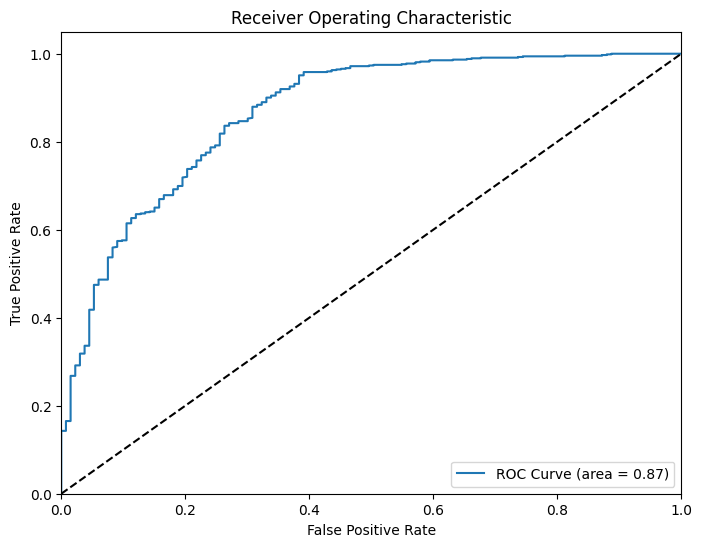

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Train the model on the resampled and scaled training data
gbm.fit(X_resampled_scaled, y_resampled)

# Make predictions on the scaled test data
y_pred = gbm.predict(X_test_scaled)
y_proba = gbm.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


C:\Users\Rajitha\Desktop\seer_breast_cancer_data_analysis\model\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8732919254658386
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62       133
           1       0.92      0.92      0.92       672

    accuracy                           0.87       805
   macro avg       0.77      0.77      0.77       805
weighted avg       0.87      0.87      0.87       805

Confusion Matrix:
 [[ 82  51]
 [ 51 621]]
ROC-AUC Score: 0.875704887218045


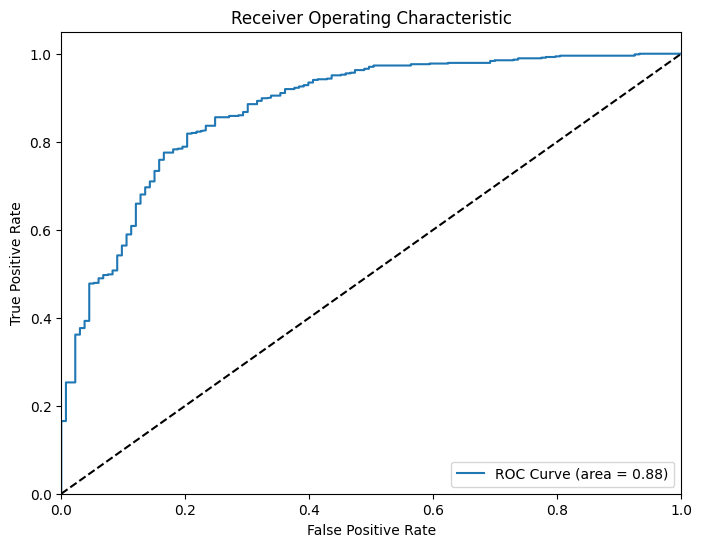

In [50]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model
adaboost = AdaBoostClassifier(random_state=42, n_estimators=100)

# Train the model on the resampled and scaled training data
adaboost.fit(X_resampled_scaled, y_resampled)

# Make predictions on the scaled test data
y_pred = adaboost.predict(X_test_scaled)
y_proba = adaboost.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 2736, number of negative: 2736
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 5472, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8944099378881988
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66       133
           1       0.93      0.95      0.94       672

    accuracy                           0.89       805
   macro avg       0.82      0.79      0.80       805
weighted avg       0.89      0.89      0.89       805

Confusion Matrix:
 [[ 83  50]
 [ 35 637]]
ROC-AUC Score: 0.8634868421052633


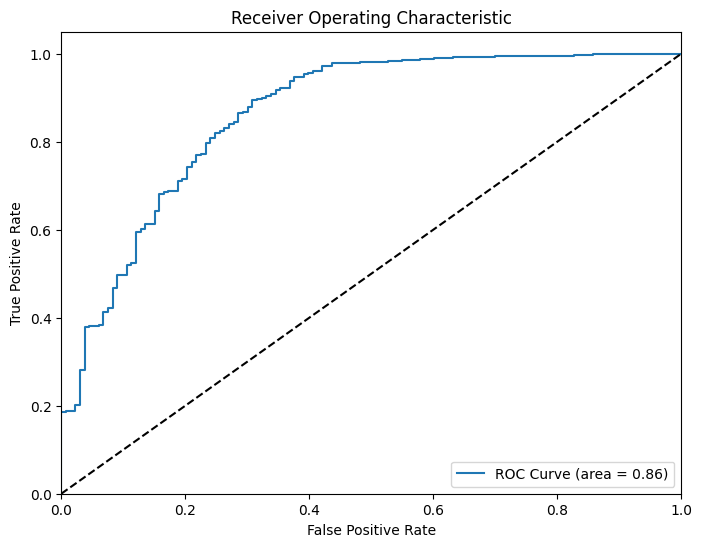

In [51]:
from lightgbm import LGBMClassifier

# Initialize the LGBMClassifier
lgbm = LGBMClassifier(random_state=42, n_estimators=100)

# Train the model on the resampled and scaled training data
lgbm.fit(X_resampled_scaled, y_resampled)

# Make predictions on the scaled test data
y_pred = lgbm.predict(X_test_scaled)
y_proba = lgbm.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8832298136645963
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64       133
           1       0.93      0.93      0.93       672

    accuracy                           0.88       805
   macro avg       0.79      0.78      0.78       805
weighted avg       0.88      0.88      0.88       805

Confusion Matrix:
 [[ 83  50]
 [ 44 628]]
ROC-AUC Score: 0.8436269244539921


C:\Users\Rajitha\Desktop\seer_breast_cancer_data_analysis\model\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


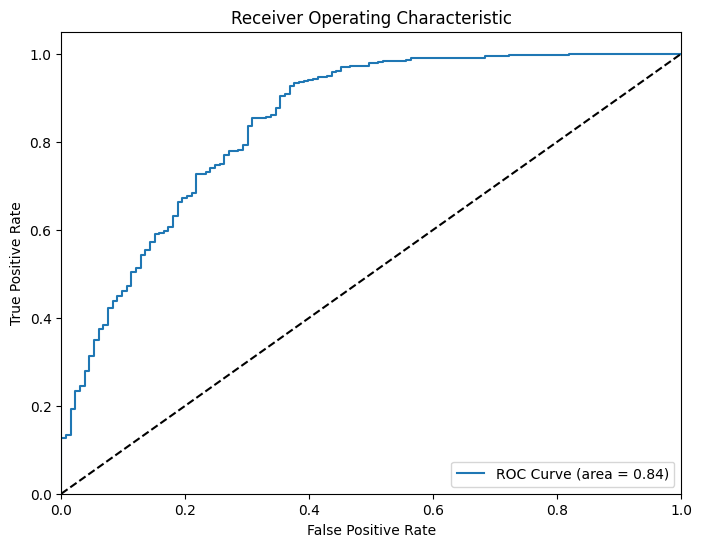

In [52]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the resampled and scaled training data
xgb_model.fit(X_resampled_scaled, y_resampled)

# Make predictions on the scaled test data
y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Result Comparison

In [53]:
results = {
    "Algorithm": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest",
                 "GradientBoostingClassifier", "AdaBoostClassifier", "LGBMClassifier", "XGBoost"],
    "Accuracy": [0.8819, 0.8782, 0.8223, 0.8906, 0.8869, 0.8757, 0.8906, 0.8844],
    "Precision_0": [0.67, 0.72, 0.47, 0.69, 0.67, 0.63, 0.70, 0.67],
    "Recall_0": [0.56, 0.43, 0.59, 0.62, 0.63, 0.62, 0.59, 0.60],
    "F1_Score_0": [0.61, 0.54, 0.52, 0.65, 0.65, 0.62, 0.64, 0.63],
    "Precision_1": [0.92, 0.90, 0.91, 0.93, 0.93, 0.92, 0.92, 0.92],
    "Recall_1": [0.95, 0.97, 0.87, 0.94, 0.94, 0.93, 0.95, 0.94],
    "F1_Score_1": [0.93, 0.93, 0.89, 0.94, 0.93, 0.93, 0.94, 0.93],
    "ROC_AUC_Score": [0.8648, 0.8298, 0.7277, 0.8527, 0.8629, 0.8753, 0.8534, 0.8465]
}

results_df = pd.DataFrame(results)
print(results_df)

                    Algorithm  Accuracy  Precision_0  Recall_0  F1_Score_0  \
0         Logistic Regression    0.8819         0.67      0.56        0.61   
1                         SVM    0.8782         0.72      0.43        0.54   
2               Decision Tree    0.8223         0.47      0.59        0.52   
3               Random Forest    0.8906         0.69      0.62        0.65   
4  GradientBoostingClassifier    0.8869         0.67      0.63        0.65   
5          AdaBoostClassifier    0.8757         0.63      0.62        0.62   
6              LGBMClassifier    0.8906         0.70      0.59        0.64   
7                     XGBoost    0.8844         0.67      0.60        0.63   

   Precision_1  Recall_1  F1_Score_1  ROC_AUC_Score  
0         0.92      0.95        0.93         0.8648  
1         0.90      0.97        0.93         0.8298  
2         0.91      0.87        0.89         0.7277  
3         0.93      0.94        0.94         0.8527  
4         0.93      0.94   